<a href="https://colab.research.google.com/github/Niguzmang/AlgorithmsUN2021II/blob/main/Lab15/AlgorithmicToolboxWeek5Group9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AlgorithmicToolbox Week 5: Dynamic Programming 1**

#5.1: Money change again

In [ ]:
import math

money = int(input())
denominations = [1, 3, 4]
minCoins = [0] + [math.inf]*money

for i in range(1, money+1):
    for j in denominations:
        if i>=j:
            coins = minCoins[i-j]+1
            if coins < minCoins[i]:
                minCoins[i] = coins

print(minCoins[money])

15
4


#5-2: Primitive Calculator

In [ ]:
import math

n = int(input())


num_operations = [0, 0] + [math.inf]*(n-1)

for i in range(2, n+1):
    temp1, temp2, temp3 = [math.inf]*3

    temp1 = num_operations[i-1] + 1 
    if i%2 == 0: temp2 = num_operations[i//2] + 1
    if i%3 == 0: temp3 = num_operations[i//3] + 1
    min_ops = min(temp1, temp2, temp3)
    num_operations[i] = min_ops

print(num_operations[n])


nums = [n]
while n!=1:
    if n%3 ==0 and num_operations[n]-1 == num_operations[n//3]:
        nums += [n//3]
        n = n//3
    elif n%2 ==0 and num_operations[n]-1 == num_operations[n//2]:
        nums += [n//2]
        n = n//2
    else:
        nums += [n-1]
        n = n - 1

print(' '.join([str(i) for i in nums][::-1]))

10
3
1 3 9 10


#5-3: Edit Distance

In [ ]:
import numpy

def EditDistance(s1, s2):

    ln_s1 = len(s1)
    ln_s2 = len(s2)

    Matrix = numpy.zeros((ln_s1+1 , ln_s2+1))
    for i in range(ln_s2+1):
        Matrix[0][i] = i

    for i in range(ln_s1+1):
        Matrix[i][0] = i


    for i in range(1, ln_s1+1):
        for j in range(1, ln_s2+1):
            insertion = Matrix[i][j-1]   + 1
            deletion  = Matrix[i-1][j]   + 1
            mismatch  = Matrix[i-1][j-1] + 1
            match     = Matrix[i-1][j-1]
            if s1[i-1] == s2[j-1]:
                Matrix[i][j] = min(insertion, deletion, match)
            if s1[i-1] != s2[j-1]:
                Matrix[i][j] = min(insertion, deletion, mismatch)
    
    return (int(Matrix[ln_s1][ln_s2]), Matrix)

def OptimalAlignment(Matrix, s1, s2, top, bottom, i, j):

    if i == 0 and j == 0:
        return (' '.join(top[::-1]), ' '.join(bottom[::-1]))

    if i>0 and Matrix[i][j] == Matrix[i-1][j] + 1:
        top.append(f'|{s1[i-1]}|')
        bottom.append('|-|')
        return OptimalAlignment(Matrix, s1, s2, top, bottom, i-1, j)

    elif j>0 and Matrix[i][j] == Matrix[i][j-1] + 1:
        bottom.append(f'|{s2[j-1]}|')
        top.append('|-|')
        return OptimalAlignment(Matrix, s1, s2, top, bottom, i, j-1)

    else:
        top.append(f'|{s1[i-1]}|')
        bottom.append(f'|{s2[j-1]}|')
        return OptimalAlignment(Matrix, s1, s2, top, bottom, i-1, j-1)

if __name__ == '__main__':
    s1, s2 = input(), input()
    edit_distance, Matrix = EditDistance(s1, s2)
    top, bottom = OptimalAlignment(Matrix, s1, s2, [], [], len(s1), len(s2))

    print(edit_distance)

ab
ab
0


#5-4: Longest Common Subsequence of Two Sequence

In [ ]:
n = int(input())
a = list(map(int, input().split()))
m = int(input())
b = list(map(int, input().split()))

lsm = [[0 for i in range(m + 1)] for j in range(n + 1)]

for i in range(1, n+1):
    for j in range(1, m+1):
        if a[i-1] == b[j-1]:
            lsm[i][j] = lsm[i-1][j-1] + 1
        elif a[i-1] != b[j-1]:
            lsm[i][j] = max(lsm[i-1][j-1], lsm[i-1][j], lsm[i][j-1])

print(lsm[n][m])

3
1 2 3
3
3 2 1
1


#5-5: Longest Common Subsequence of Three Sequence

In [ ]:
import sys

an = int(input())
a = list(map(int, input().split()))
bn = int(input())
b = list(map(int, input().split()))
cn = int(input())
c = list(map(int, input().split()))

T = [[[0]*(len(a)+1) for _ in range(len(b)+1)] for ex in range(len(c)+1)]
for i in range(1,len(a)+1):
    for j in range(1,len(b)+1):
        for k in range(1,len(c)+1):
            if a[i-1]==b[j-1]==c[k-1]:
                T[k][j][i] = T[k-1][j-1][i-1] + 1
            else :
                T[k][j][i] = max(T[k-1][j][i],T[k][j-1][i],T[k][j][i-1])

print(T[k][j][i])

3
1 2 3
3
2 1 3
3
1 3 5
2


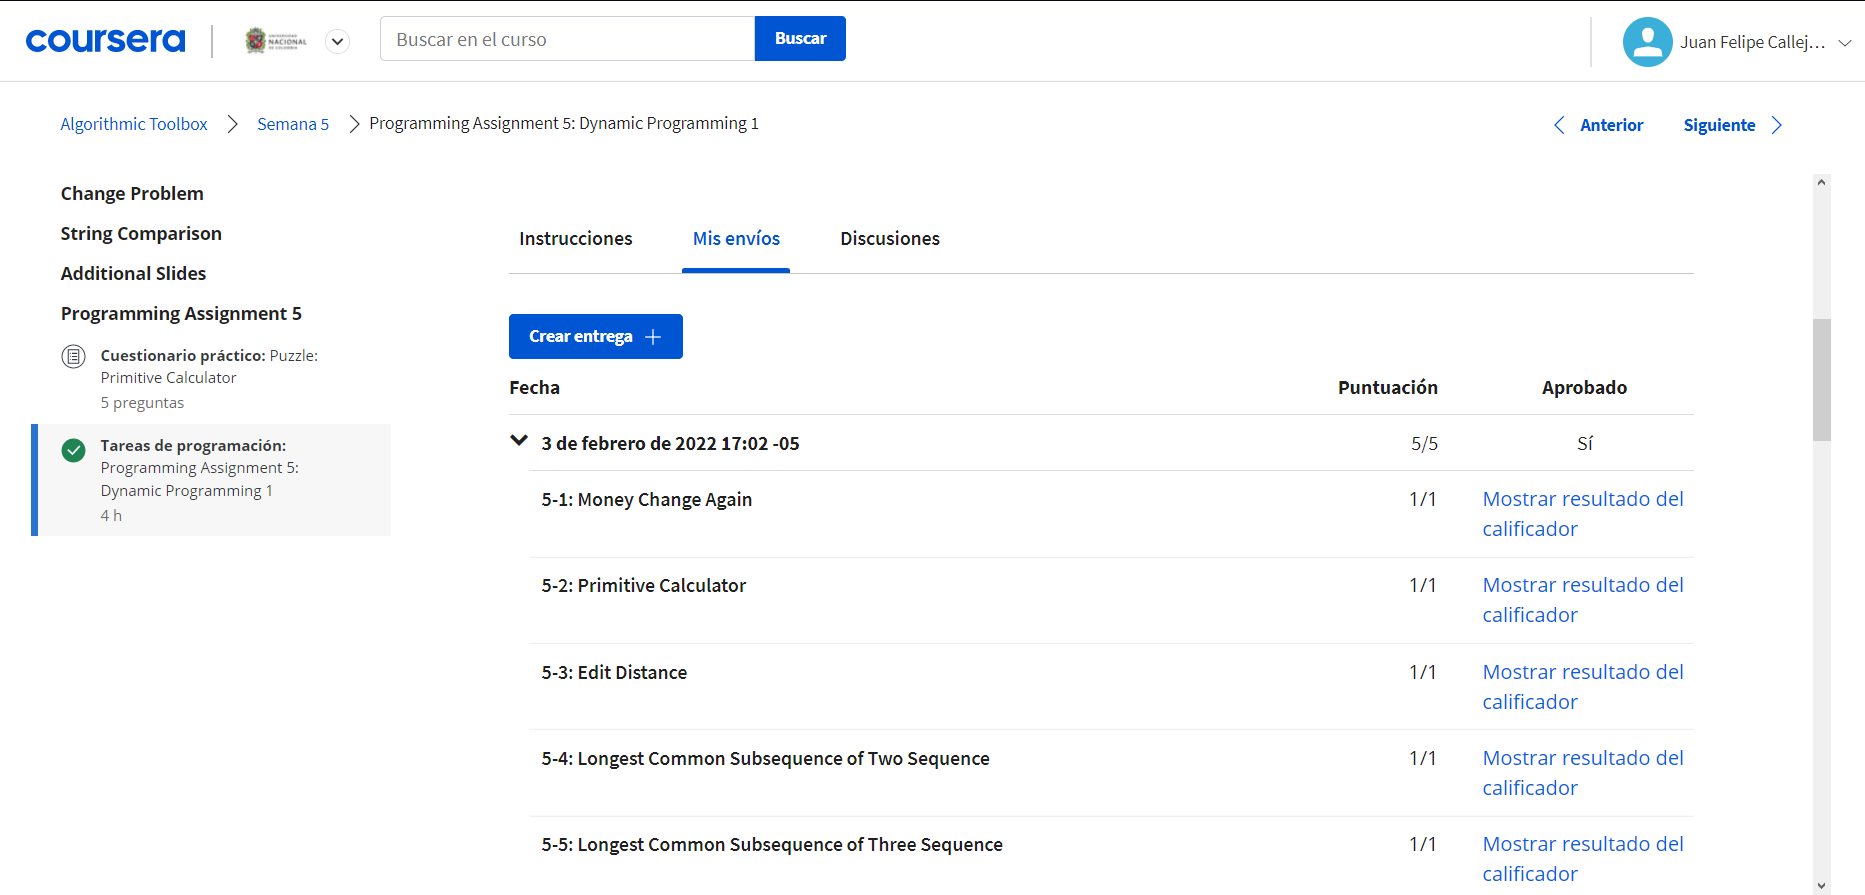

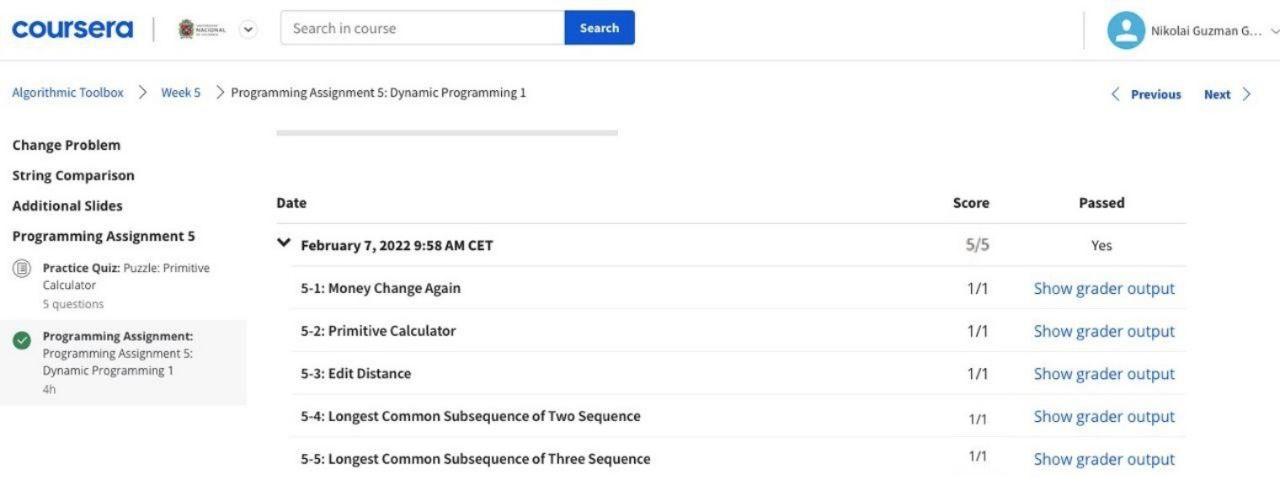